## Feet Size : Getting the (wrong) picture from the data

Researchers measured the foot size (in cm) of a large number of students. They also gave them a dictation and counted the number of "mistakes" made by each. Data were collected on all classes in an elementary school.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

On charge dans un premier les données contenues dans le pdf. On obtient donc un dictionnaire qui contient la taille de pieds (en cm) d'un certains nombre d'élèves ainsi que le nombre d'erreurs relevées pour chacun(e) d'entre eux lors d'une dictée. On cherche à savoir s'il y a une potentielle corrélation entre ces deux mesures

In [2]:
data = {17.5: [15, 18, 19, 20], 18: [16, 17, 18, 19], 18.5: [14, 16, 17], 19: [15, 16], 20: [13, 14, 15], 20.5: [12, 13, 14], 21: [10, 11, 13, 15], 21.5: [10, 12, 13], 22: [8, 10, 11, 12], 23: [8, 9, 10], 23.5: [7, 8, 9, 11], 24: [6, 8, 9], 24.5: [6, 7, 8, 10], 25: [4, 6, 7, 8], 25.5: [5, 6], 26: [4, 5, 7], 26.5: [3, 4, 5], 27: [2, 3, 4, 7], 27.5: [2, 3], 28: [0, 1, 2, 4], 28.5: [0, 2], 29: [0, 1, 2]}

On reformate ensuite ces données pour les stocker dans un dataframe pandas, dans le but de les exploiter plus facilement ensuite pour nos différentes visualisations.

In [3]:
temporaire = []
for feet_size in data:
    for mistakes in data[feet_size]:
        temporaire.append([feet_size, mistakes])
df = pd.DataFrame(temporaire, columns=["Feet size", "Mistakes"])
df.head()

,Feet size,Mistakes
0,17.5,15
1,17.5,18
2,17.5,19
3,17.5,20
4,18.0,16


La première visualisation qui vient en tête est simplement de representer l'évolution du nombre d'erreur en fonction de la taille des pieds : $mistakes = f(feet$_$size)$

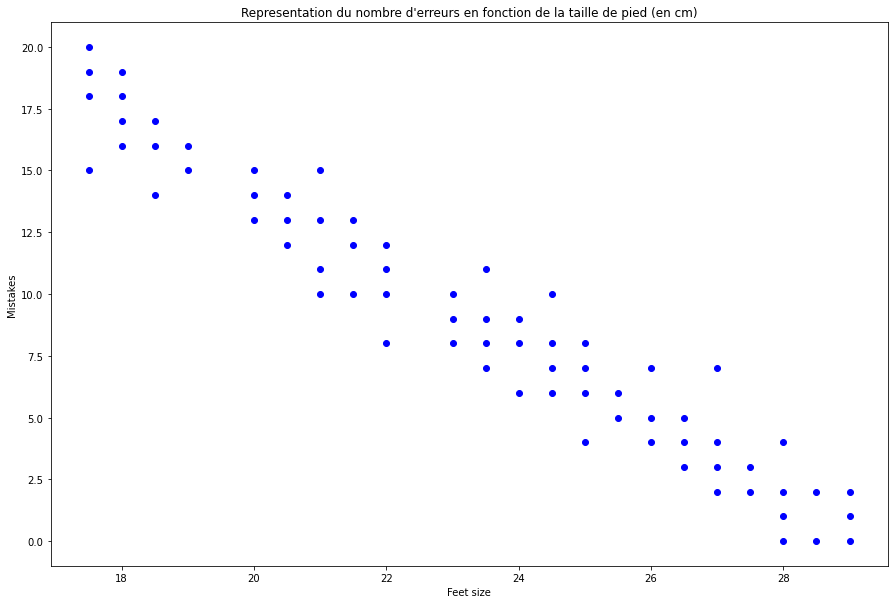

In [4]:
plt.figure(figsize=(15, 10))
plt.scatter(df['Feet size'], df['Mistakes'], color = 'b')

plt.xlabel("Feet size")
plt.ylabel("Mistakes")
plt.title("Representation du nombre d'erreurs en fonction de la taille de pied (en cm)")
plt.show()

A première vue, en lisant simplement le graphe on constate que le nombre d'erreurs diminue lorsque la taille des pieds augmente. On peut tirer trois potentielles conclusions à ce stade : 

* Les deux variables sont correlées et ainsi la taille des pieds influence le nombre d'erreurs lors d'une dictée.

* Pour ce dataset, on a donné la même dictée à des élèves de niveaux différents (du CP au CM2). On peut imaginer qu'un élève de CM2 étant plus agé qu'un élève de CP aura plus souvent des pieds plus longs. Ainsi dans ce contexte, les plus grands pieds correspondent à des pieds d'élèves de niveaux avancés, plus préparés aux dictée et donc moins sujets aux fautes. 

* On ne peut tirer aucune conclusion à ce stade.

Comme pour l'exercice Kindergarten, on va alors chercher à integrer des indicateurs statistiques pour affiner notre analyse et peut-être parvenir à une conclusion. Ici on peut par exemple laisser de coté le nuage de points et tracer une courbe representant les différentes tailles de pieds ainsi que la variance qui pour une même taille de pieds montre les variations des notes des élèves. 

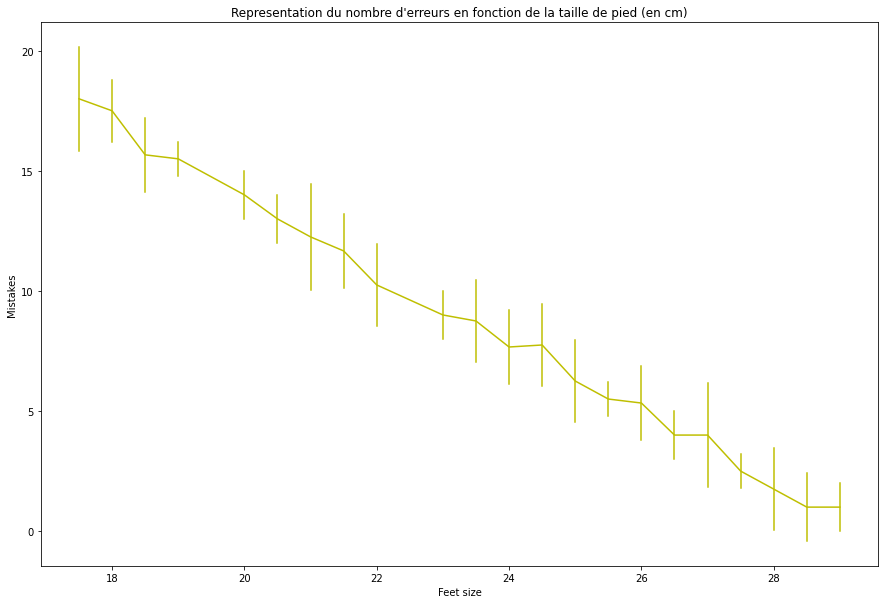

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=df, x="Feet size", y="Mistakes", err_style="bars", ci='sd', ax=ax, color = 'y')
ax.set_title("Representation du nombre d'erreurs en fonction de la taille de pied (en cm)")
plt.show()

## Analyse

En lisant l'enoncé de cet exercice, avant même de visualiser nos différentes données, à priori il n'existe pas de correlation entre la taille des pieds d'un élèves et le nombre de fautes qu'il peut faire lors d'une dictée. Cela ne semble pas avoir de sens. Or, en traçant différents graphes, on se rend compte qu'il existe une correlation négative entre ces deux variables puisque quand la taille des pieds des élèves augmente, leur nombre de faute lors de la dictée diminue. 

Si on réfléchit à ce résultat contre intuitif, on se rend compte qu'en réalité l'experience est "faussée" et c'est ce qui créer cette corrélation. En effet, ici les élèves n'ont pas tous le même profils car ils sont d'âge et de niveaux différents. Cette différence de niveau est d'autant plus accentuée que les élèves sont tous en primaire, moment où l'enfant se construit et apprend toutes les bases qui lui serviront plus tard. On compare donc ici des élèves potentiellement en CP avec des élèves de CM2 et on sait que la différence de niveau entre eux est bien plus grande que la différence entre un Terminal et un Première par exemple. Quand l'élève de CP apprend à lire, compter et écrire, l'élèves de CM2 lui sait deja conjuguer des verbes et rédiger de courts textes. Un élève de CM2 sera donc moins sujet à faire des fautes qu'un élève de CP en règle générale. 

Si on s'interesse maintenant à la longueur des pieds, en règle generale en primaire, étant en pleine croissance, plus l'élève sera agé, plus ses pieds seront longs. Si on reprend donc notre exemple CP/CM2, un élève de CM2 aura en règle générale les pieds plus longs qu'un élève de CP. 

Conclusion : Du fait de la manière dont sont obtenues nos données ici, on retrouve une corrélation qui à première vue n'est pas du tout intuitive. On peut également citer la taille du dataset qui est relativement petit et qui "amplifie" cette correlation.